In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# plt.scatter(data[ix, 0], data[ix, 1], color='red')

#--------------- keras imports -------------------#
import keras
from keras.layers import Input, Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [16]:
mean_01 = np.array([3.0, 3.0])
cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])

mean_02 = np.array([-3.0, 1.0])
cov_02 = np.array([[0.5, 0.4], [0.4, 0.7]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

total_data_size = dist_01.shape[0] + dist_02.shape[0]
data_dim = dist_01.shape[1]

labels = np.zeros((total_data_size,))
labels[dist_01.shape[0]:] = 1

data = np.zeros((total_data_size, data_dim + 1))

data[:dist_01.shape[0], :data_dim] = dist_01
data[dist_02.shape[0]:, :data_dim] = dist_02

data[:, -1] = labels

np.random.shuffle(data)

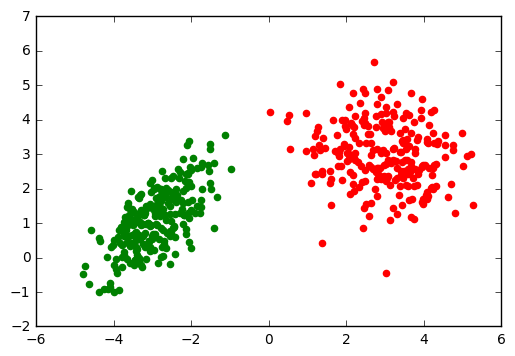

In [15]:
plt.figure(0)

for ix in range(data.shape[0]):
    if data[ix, -1] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
plt.show()